<a href="https://colab.research.google.com/github/asadimtiazmalik/wheat-phenology-estimation/blob/main/Near_Real_time_monitoring_of_wheat_phenology_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Numerical Analysis of climate variables affecting NDVI**

## **Collecting data for weather through API** 



In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 

In [ ]:
import requests
import datetime
params = ["avgtempC", "precipMM", "humidity"]

In [ ]:
def parse(param, init = '21-11-1'):
 temp = list() 
 is_completed = False
 while True:
  date_init = datetime.datetime.strptime(init, "%y-%m-%d")
  end_date = (date_init + datetime.timedelta(days=10)).date().strftime('%y-%m-%d')
  if end_date.split('-')[1] == '05':
    end_date = (date_init + datetime.timedelta(days=4)).date().strftime('%y-%m-%d')
    is_completed = True 
  query = f"http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key=f606ef6ab4094a30ad9200208222209&q=Gujranwala&format=json&date=20{init}&enddate=20{end_date}&includelocation=yes&tp=24"
  weather = requests.get(query).json()['data']['weather']
  for day in weather:
    if param == "precipMM":
      temp.append((day['date'], day['hourly'][0][param]))
    elif param == "humidity":
      temp.append((day['date'], day['hourly'][0][param]))
    else:
      temp.append((day['date'], day[param]))
  init = (date_init + datetime.timedelta(days=11)).date().strftime('%y-%m-%d')
  if is_completed:
    break
 return temp


## **Data Collection for years 2020 and 2021**

In [ ]:
import pandas as pd 

# Creating dataframe for the year 2021
df_21 = pd.DataFrame()

# Collecting data for the year 2021 from the API
date = [date for date, temperature in parse(params[0])]
temperature = [int(temperature) for date, temperature in parse(params[0])]
rain = [float(ppt) for date, ppt in parse(params[1])]
humidity = [float(hum) for date, hum in parse(params[2])]

# Creating Dataframe with Temperature, Rainfall and Humididty
df_21['Date'] = date
df_21['Date'] = pd.to_datetime(df_21['Date'], format='%Y-%m-%d')
df_21 = df_21.set_index('Date')
df_21['Temperature'] = temperature
df_21['Rainfall'] = rain
df_21['Humidity'] = humidity

df_21.head()

In [ ]:
# Creating dataframe for the year 2020
df_20 = pd.DataFrame()

# Collecting data for the year 2020 from the API
date = [date for date, temperature in parse(params[0], '20-11-1')]
temperature = [int(temperature) for date, temperature in parse(params[0], '20-11-1')]
rain = [float(ppt) for date, ppt in parse(params[1], '20-11-1')]
humidity = [float(hum) for date, hum in parse(params[2], '20-11-1')]

# Creating Dataframe with Temperature, Rainfall and Humididty 
df_20['Date'] = date
df_20['Date'] = pd.to_datetime(df_20['Date'], format='%Y-%m-%d')
df_20 = df_20.set_index('Date')
df_20['Temperature'] = temperature
df_20['Rainfall'] = rain
df_20['Humidity'] = humidity

df_20.head()

## **Moving Averages over the interval of 15 days using rolling window**

In [ ]:
x1= df_21.iloc[:,0].rolling(window=15).mean().to_list()

In [ ]:
x2= df_20.iloc[:,0].rolling(window=15).mean().to_list()

In [ ]:
df2x1= df_21.iloc[:,0].rolling(window=15).mean().to_dict()

In [ ]:
df2x1.keys()

In [ ]:
df2x2= df_20.iloc[:,0].rolling(window=15).mean().to_dict()

In [ ]:
elems1 = list()
for i, elem in enumerate(x1):
  if i%14 == 0:
    elems1.append(elem)
elems1=elems1[1:]

In [ ]:
elems2 = list()
for i, elem in enumerate(x2):
  if i%14 == 0:
    elems2.append(elem)
elems2=elems2[1:]

In [ ]:
count = 0
new1=list()
for i, key in enumerate(df2x1.keys()):
  if len(elems1) == count:
    print('broken')
    break
  if df2x1[key] == elems1[count]:
    new1.append((key, elems1[count]))
    count+=1


broken


In [ ]:
count = 0
new2=list()
for i, key in enumerate(df2x2.keys()):
  if len(elems2) == count:
    print('broken')
    break
  if df2x2[key] == elems2[count]:
    new2.append((key, elems2[count]))
    count+=1

broken


In [ ]:
new1,new2

([(Timestamp('2021-11-15 00:00:00'), 25.333333333333332),
  (Timestamp('2021-11-29 00:00:00'), 22.733333333333334),
  (Timestamp('2021-12-13 00:00:00'), 20.466666666666665),
  (Timestamp('2021-12-27 00:00:00'), 17.0),
  (Timestamp('2022-01-10 00:00:00'), 15.4),
  (Timestamp('2022-01-24 00:00:00'), 14.8),
  (Timestamp('2022-01-27 00:00:00'), 14.6),
  (Timestamp('2022-02-21 00:00:00'), 16.866666666666667),
  (Timestamp('2022-03-07 00:00:00'), 19.133333333333333),
  (Timestamp('2022-03-21 00:00:00'), 28.4),
  (Timestamp('2022-04-04 00:00:00'), 33.733333333333334),
  (Timestamp('2022-04-18 00:00:00'), 36.53333333333333)],
 [(Timestamp('2020-11-15 00:00:00'), 26.266666666666666),
  (Timestamp('2020-11-29 00:00:00'), 20.2),
  (Timestamp('2020-12-13 00:00:00'), 21.466666666666665),
  (Timestamp('2020-12-27 00:00:00'), 17.333333333333332),
  (Timestamp('2021-01-07 00:00:00'), 16.533333333333335),
  (Timestamp('2021-01-19 00:00:00'), 17.133333333333333),
  (Timestamp('2021-02-07 00:00:00'), 18.

In [ ]:
list(zip(*new2))[0][0].date()

datetime.date(2020, 11, 15)

In [ ]:
for date, data in new1:
  if date2num(date) in date2num(list(zip(*new2))[0]):
    print(date)

In [ ]:
from dateutil.relativedelta import relativedelta
temp_20 = list()
temp_21 = list()

for date,data in new1:
  print(f"Temperature in {date.month}th month of 2021-2022: {df2x1[date]}")
  temp_21.append((date,df2x1[date]))
  date = date - relativedelta(years=1)
  print(f"Temperature in {date.month}th month of 2020-2021: {df2x2[date]}")
  temp_20.append((date,df2x2[date]))
  print('------------------')
  

Temperature in 11th month of 2021-2022: 25.333333333333332
Temperature in 11th month of 2020-2021: 26.266666666666666
------------------
Temperature in 11th month of 2021-2022: 22.733333333333334
Temperature in 11th month of 2020-2021: 20.2
------------------
Temperature in 12th month of 2021-2022: 20.466666666666665
Temperature in 12th month of 2020-2021: 21.466666666666665
------------------
Temperature in 12th month of 2021-2022: 17.0
Temperature in 12th month of 2020-2021: 17.333333333333332
------------------
Temperature in 1th month of 2021-2022: 15.4
Temperature in 1th month of 2020-2021: 16.533333333333335
------------------
Temperature in 1th month of 2021-2022: 14.8
Temperature in 1th month of 2020-2021: 17.133333333333333
------------------
Temperature in 1th month of 2021-2022: 14.6
Temperature in 1th month of 2020-2021: 17.333333333333332
------------------
Temperature in 2th month of 2021-2022: 16.866666666666667
Temperature in 2th month of 2020-2021: 22.733333333333334
-

<BarContainer object of 12 artists>

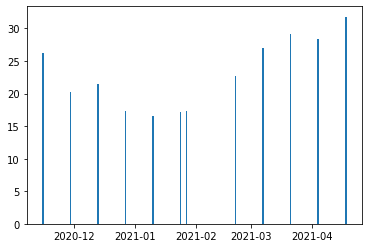

In [ ]:
plt.bar(date1,data1)

<BarContainer object of 12 artists>

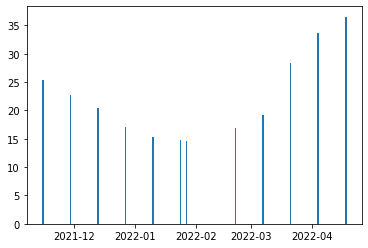

In [ ]:
plt.bar(date2,data2)

In [ ]:
for i, date in enumerate(date1):
    if len(date1) == i+1:
      break
    else:
      print(date1[i+1]-date)
    

14 days 00:00:00
14 days 00:00:00
14 days 00:00:00
14 days 00:00:00
3 days 00:00:00
25 days 00:00:00
14 days 00:00:00
14 days 00:00:00
14 days 00:00:00
14 days 00:00:00


In [ ]:
date1[7:]

(Timestamp('2021-02-21 00:00:00'),
 Timestamp('2021-03-07 00:00:00'),
 Timestamp('2021-03-21 00:00:00'),
 Timestamp('2021-04-04 00:00:00'),
 Timestamp('2021-04-18 00:00:00'))

In [ ]:
y = np.arange(len(date1[7:]))
y

array([0, 1, 2, 3, 4])

In [ ]:
y = np.arange(1,len(date1[7:])+1)
y

array([1, 2, 3, 4, 5])

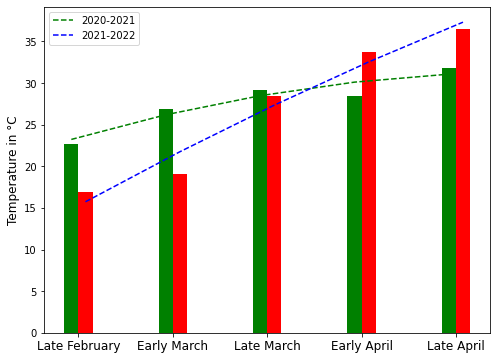

In [ ]:
x = date1[7:]
y = np.arange(0,len(date1[7:]))
# y = date2num(x)
months = {11:'November', 12:'December', 1:'January', 2:'February', 3:'March', 4:'April', 5:'May'}

width=0.15

plt.figure(figsize=(8,6))

params_20 = np.polyfit(y, data1[7:], deg=2)
params_21 = np.polyfit(y + width, data2[7:], deg=2)
vals_20 = np.polyval(params_20, y)
vals_21 = np.polyval(params_21, y + width)

ax = plt.subplot(111)
ax.bar(y,np.asarray(data1[7:]), width=width, color='g', align='center')
plt.plot(y, vals_20, '--g')
ax.bar(y+width, np.asarray(data2[7:]), width=width, color='r', align='center')
plt.plot(y + width, vals_21, '--b')
# ax.xaxis_date()
# ax.set_xticklabels(('November', 'December', 'January', 'February', 'March', 'April', 'May'))
# ax.set_xticklabels(('February', 'March', 'April', 'May'))
ax.set_xticks(y + width / 2)

ax.set_xticklabels(
        ['Late February', 'Early March', 'Late March', 'Early April', 'Late April']
        )
# plt.xticks(rotation=45, ha='center')
# ax.xaxis.set_ticks_position('none') 
plt.xticks(fontsize=12)
plt.legend(['2020-2021', '2021-2022'])
# plt.title("Temperature Data for current and previous year")
plt.ylabel('Temperature in °C', fontsize=12)
# plt.xlabel('Month')


plt.show()

## **Fixed average on 15 day interval**

### **Temperature 2020 and 2021**

In [ ]:
first = df_20[df_20.index.to_series().between('2021-02-01', '2021-02-15')].mean()[0]
second = df_20[df_20.index.to_series().between('2021-02-15', '2021-02-28')].mean()[0]
third = df_20[df_20.index.to_series().between('2021-03-01', '2021-03-15')].mean()[0]
fourth = df_20[df_20.index.to_series().between('2021-03-15', '2021-03-30')].mean()[0]
# newth = df_20[df_20.index.to_series().between('2021-03-21', '2021-03-30')].mean()[0]
fifth = df_20[df_20.index.to_series().between('2021-04-01', '2021-04-15')].mean()[0]
sixth = df_20[df_20.index.to_series().between('2021-04-15', '2021-04-30')].mean()[0]
temp_20 = [first,second,third,fourth,fifth,sixth]

In [ ]:
first = df_21[df_21.index.to_series().between('2022-02-01', '2022-02-15')].mean()[0]
second = df_21[df_21.index.to_series().between('2022-02-15', '2022-02-28')].mean()[0]
third = df_21[df_21.index.to_series().between('2022-03-01', '2022-03-15')].mean()[0]
fourth = df_21[df_21.index.to_series().between('2022-03-15', '2022-03-30')].mean()[0]
# newth = df_21[df_21.index.to_series().between('2022-03-21', '2022-03-30')].mean()[0]
fifth = df_21[df_21.index.to_series().between('2022-04-01', '2022-04-15')].mean()[0]
sixth = df_21[df_21.index.to_series().between('2022-04-15', '2022-04-30')].mean()[0]
temp_21 = [first,second,third,fourth,fifth,sixth]

### **NDVI 2020 and 2021**

In [ ]:
first = df_20[df_20.index.to_series().between('2021-02-01', '2021-02-15')].mean()[3]
second = df_20[df_20.index.to_series().between('2021-02-15', '2021-02-28')].mean()[3]
third = df_20[df_20.index.to_series().between('2021-03-01', '2021-03-15')].mean()[3]
fourth = df_20[df_20.index.to_series().between('2021-03-15', '2021-03-30')].mean()[3]
# newth = df_20[df_20.index.to_series().between('2021-03-21', '2021-03-30')].mean()[0]
fifth = df_20[df_20.index.to_series().between('2021-04-01', '2021-04-15')].mean()[3]
sixth = df_20[df_20.index.to_series().between('2021-04-15', '2021-04-30')].mean()[3]
ndvi_20 = [first,second,third,fourth,fifth,sixth]

In [ ]:
first = df_21[df_21.index.to_series().between('2022-02-01', '2022-02-15')].mean()[3]
second = df_21[df_21.index.to_series().between('2022-02-15', '2022-02-28')].mean()[3]
third = df_21[df_21.index.to_series().between('2022-03-01', '2022-03-15')].mean()[3]
fourth = df_21[df_21.index.to_series().between('2022-03-15', '2022-03-30')].mean()[3]
# newth = df_21[df_21.index.to_series().between('2022-03-21', '2022-03-30')].mean()[0]
fifth = df_21[df_21.index.to_series().between('2022-04-01', '2022-04-15')].mean()[3]
sixth = df_21[df_21.index.to_series().between('2022-04-15', '2022-04-30')].mean()[3]
ndvi_21 = [first,second,third,fourth,fifth,sixth]

### **Rain 2020 and 2021**

In [ ]:
first = df_20[df_20.index.to_series().between('2021-02-01', '2021-02-15')].mean()[1]
second = df_20[df_20.index.to_series().between('2021-02-15', '2021-02-28')].mean()[1]
third = df_20[df_20.index.to_series().between('2021-03-01', '2021-03-15')].mean()[1]
fourth = df_20[df_20.index.to_series().between('2021-03-15', '2021-03-30')].mean()[1]
# newth = df_20[df_20.index.to_series().between('2021-03-21', '2021-03-30')].mean()[0]
fifth = df_20[df_20.index.to_series().between('2021-04-01', '2021-04-15')].mean()[1]
sixth = df_20[df_20.index.to_series().between('2021-04-15', '2021-04-30')].mean()[1]
rain_20 = [first,second,third,fourth,fifth,sixth]

In [ ]:
first = df_21[df_21.index.to_series().between('2022-02-01', '2022-02-15')].mean()[1]
second = df_21[df_21.index.to_series().between('2022-02-15', '2022-02-28')].mean()[1]
third = df_21[df_21.index.to_series().between('2022-03-01', '2022-03-15')].mean()[1]
fourth = df_21[df_21.index.to_series().between('2022-03-15', '2022-03-30')].mean()[1]
# newth = df_21[df_21.index.to_series().between('2022-03-21', '2022-03-30')].mean()[0]
fifth = df_21[df_21.index.to_series().between('2022-04-01', '2022-04-15')].mean()[1]
sixth = df_21[df_21.index.to_series().between('2022-04-15', '2022-04-30')].mean()[1]
rain_21 = [first,second,third,fourth,fifth,sixth]

## **Rate of change of weather w.r.t NDVI**

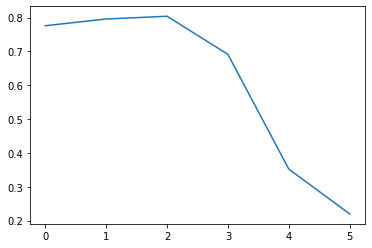

In [ ]:
plt.plot(ndvi_21)

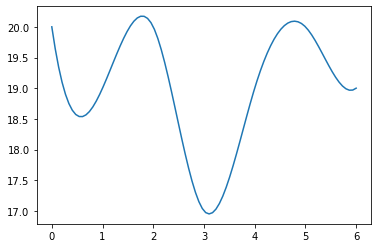

In [ ]:
from scipy.interpolate import CubicSpline
x = np.arange(0, 89)
y = tem_20
cs = CubicSpline(x, y)
xs = np.linspace(0,6,90)
plt.plot(xs, cs(xs), label="S")

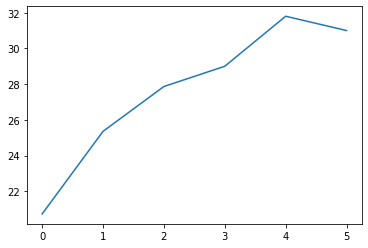

In [ ]:
plt.plot(temp_20)

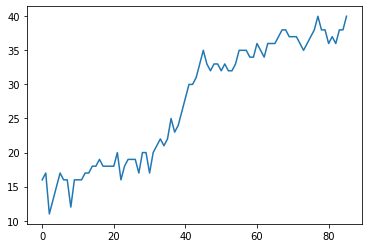

In [ ]:
from scipy.interpolate import CubicSpline
x = np.arange(0, 86)
y = tem_21
cs_ = CubicSpline(x, y)
xs = np.arange(0,86)
plt.plot(xs, cs_(xs), label="S")

In [ ]:
from scipy.signal import savgol_filter
result = savgol_filter(tem_21, 89, 3)
# plt.plot(np.arange(0,89),result)

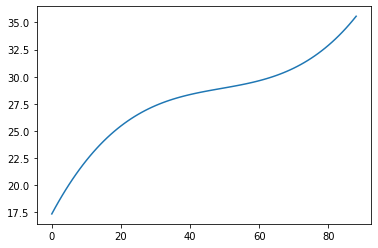

In [ ]:
from scipy.signal import savgol_filter
result2 = savgol_filter(tem_20, 89, 3)
plt.plot(result2)

Here we have plotted the derivative or the rate of change of temperature and rainfall w.r.t the of days critical for wheat growth

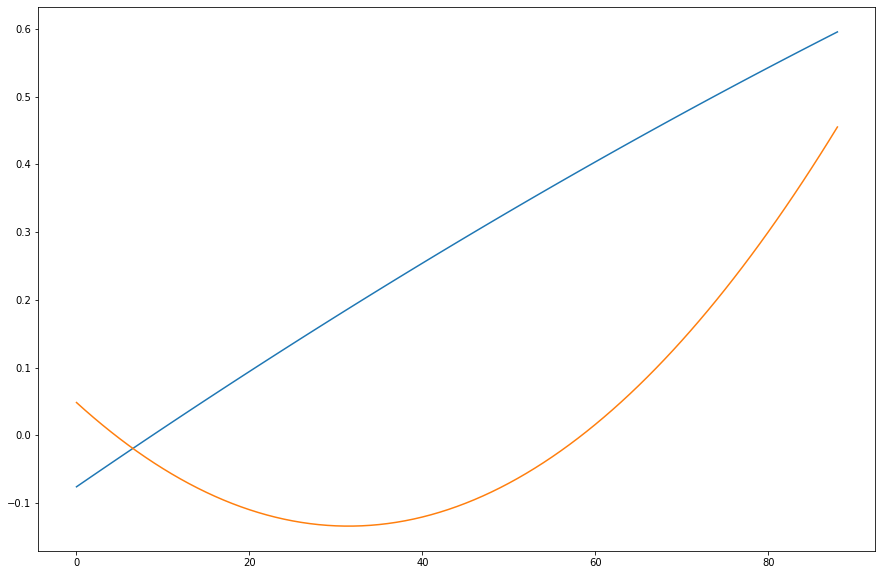

In [ ]:
plt.figure(figsize=(15,10))
from scipy.interpolate import make_interp_spline
from scipy.interpolate import UnivariateSpline
x = np.arange(0,6)
y = temp_20

x_new = np.linspace(0,6,90)
a_BSpline =  UnivariateSpline(x,np.asarray(rain_20))
y_new = a_BSpline(x_new)

x_new1 = np.linspace(0,6,90)
a_BSpline =  UnivariateSpline(x,np.asarray(rain_21))
y_new1 = a_BSpline(x_new1)
plt.plot(np.diff(y_new)/np.diff(x_new)) #2020
plt.plot(np.diff(y_new1)/np.diff(x_new1)) #2021

The function `coefficient` computes the equation for the rate of change of climate factors w.r.t days critical to growth of wheat

In [ ]:
def coefficient(x,y):
    
    x_1 = x[40]
    x_2 = x[60]
    x_3 = x[80]
    y_1 = y[40]
    y_2 = y[60]
    y_3 = y[80]

    a = y_1/((x_1-x_2)*(x_1-x_3)) + y_2/((x_2-x_1)*(x_2-x_3)) + y_3/((x_3-x_1)*(x_3-x_2))

    b = (-y_1*(x_2+x_3)/((x_1-x_2)*(x_1-x_3))
         -y_2*(x_1+x_3)/((x_2-x_1)*(x_2-x_3))
         -y_3*(x_1+x_2)/((x_3-x_1)*(x_3-x_2)))

    c = (y_1*x_2*x_3/((x_1-x_2)*(x_1-x_3))
        +y_2*x_1*x_3/((x_2-x_1)*(x_2-x_3))
        +y_3*x_1*x_2/((x_3-x_1)*(x_3-x_2)))

    return a,b,c

x = np.diff(y_new1)/np.diff(x_new)
y = np.linspace(0,6,89)

a,b,c = coefficient(x, y)

print(a)
print(b)
print(c)

-12.298379167688879
8.688008641226222
3.9546638573769903


2020 Temperature 

a, b, c values for ax<sup>2</sup> + bx + c

In [ ]:
0<x<2.7
0.12496522016748113
-1.6903540226780476
5.262976306088843
--------------------------------
2.7<x<6
-31.54558449501735
88.44523508172284
-56.10596811341853



2021 Temperature 

In [ ]:
0<x<2.7
0.12507631963192367
-0.5154039375036688
-0.1281956105827039

2.7<x<6.0
-0.014942919051756105
-0.18691788645674567
4.873400916890016

2020 rainfall

In [ ]:
0<x<2.7
1.5705644341394134
7.980806387973386
0.5977067979178994

2.7<x<6.0
2.3485023825742246
7.573381301127242
0.6510048658200596

2021 rainfall

In [ ]:
0<x<2.7
205.5767254006039
21.464742484318748
1.2402195275204004

2.7<x<6.0
-12.298379167688879
8.688008641226222
3.9546638573769903

In [ ]:
np.diff(y_new)/np.diff(x_new)

In [ ]:
np.diff(y_new)/np.diff(x_new)

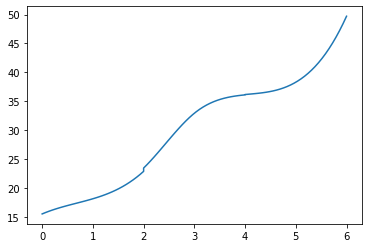

In [ ]:
plt.plot(np.concatenate((x_new,x_new_2,x_new_3)), y_new1)

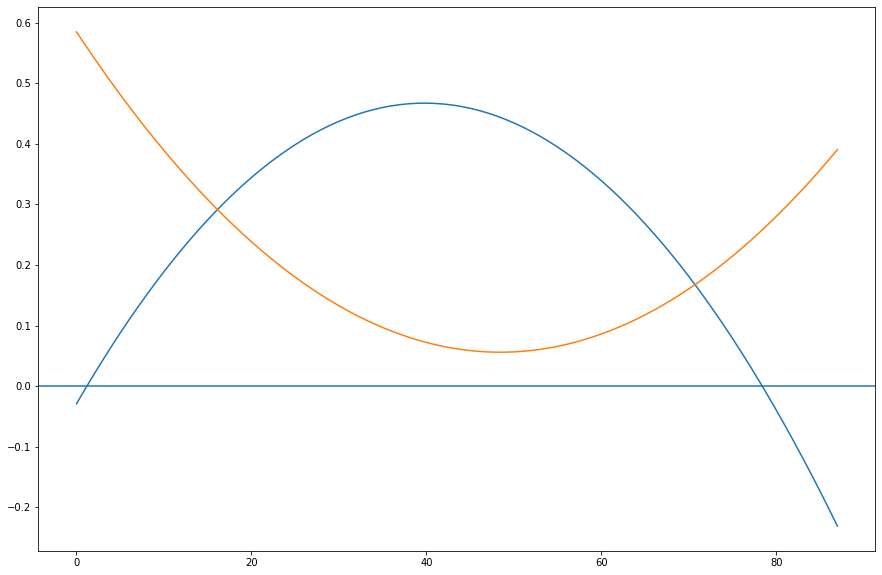

In [ ]:
import numpy as np
plt.figure(figsize=(15,10))
y = result
y21 = result2
x1 = np.arange(0,89)
# x2 = x_new
dx1 = np.diff(y)/np.diff(x1)
dx2 = np.diff(y21)/np.diff(x1)
plt.plot(dx1) #2021
plt.plot(dx2) #2020
plt.axhline(0)

In [ ]:
tem_21 = np.asarray(df_21[df_21.index.to_series().between('2022-02-01', '2022-04-30')]['Temperature'])
rn_21 = np.asarray(df_21[df_21.index.to_series().between('2022-02-01', '2022-04-30')]['Rainfall'])
# nd_21 = np.asarray(df_21[df_21.index.to_series().between('2022-02-01', '2022-04-30')]['NDVI'])

In [ ]:
tem_20 = np.asarray(df_20[df_20.index.to_series().between('2021-02-01', '2021-04-30')]['Temperature'])
rn_20 = np.asarray(df_20[df_20.index.to_series().between('2021-02-01', '2021-04-30')]['Rainfall'])
# nd_20 = np.asarray(df_20[df_20.index.to_series().between('2021-02-01', '2021-04-30')]['NDVI'])[:-1]

In [ ]:
np.linalg.lstsq(A, y, rcond=None)[0]

array([-0.02968204, -0.09976583,  1.43866043])

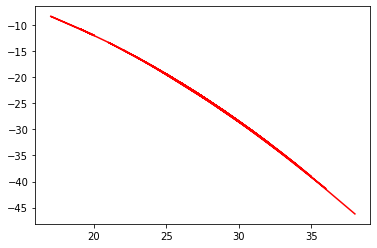

In [ ]:
A = np.vstack([x, z, np.ones(len(x))]).T
a, b, c = np.linalg.lstsq(A, y1, rcond=None)[0]
_ = plt.plot(x, a*x**2 + b*x + c, 'r', label='Fitted line')

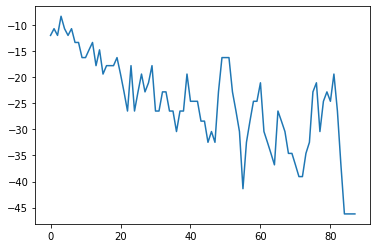

In [ ]:
def func(x):
  return a*x**2 + b*x + c
y_20 = func(x)
plt.plot(y_20)

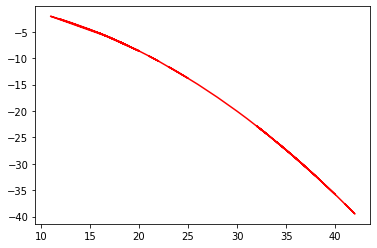

In [ ]:
A = np.vstack([x, z, np.ones(len(x))]).T
a, b, c = np.linalg.lstsq(A, y, rcond=None)[0]
_ = plt.plot(x, a*x**2 + b*x + c, 'r', label='Fitted line')

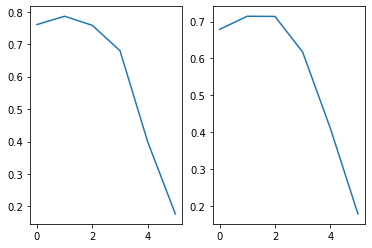

In [ ]:
plt.subplot(121)
plt.plot(ndvi_21)
plt.subplot(122)
plt.plot(ndvi_20)

In [ ]:
temp_20

[20.733333333333334, 25.357142857142858, 27.866666666666667, 29.0, 31.8, 32.0]

In [ ]:
months = ['Early February','Late February', 'Early March','Late March', 'Early April', 'Late April']
print('-------Temperature-->2021-------')
for i, month in enumerate(months):

  print(f"{month}: {temp_20[i]:.1f}°C")
print('-------Temperature-->2022-------')
for i, month in enumerate(months):

  print(f"{month}: {temp_21[i]:.1f}°C")

-------Temperature-->2021-------
Early February: 20.7°C
Late February: 25.4°C
Early March: 27.9°C
Late March: 29.0°C
Early April: 31.8°C
Late April: 32.0°C
-------Temperature-->2022-------
Early February: 15.5°C
Late February: 18.2°C
Early March: 23.3°C
Late March: 32.9°C
Early April: 36.1°C
Late April: 38.2°C


In [ ]:
y = np.arange(0,len(temp_20))
params_20 = np.polyfit(y, np.asarray(temp_20), deg=3)
params_21 = np.polyfit(y + width, np.asarray(temp_20), deg=3)
vals_20 = np.polyval(params_20, y)
vals_21 = np.polyval(params_21, y)


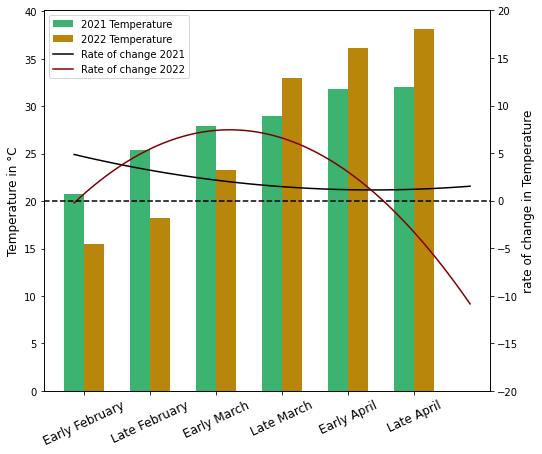

In [ ]:
from scipy.interpolate import make_interp_spline, BSpline
y = np.arange(0,len(temp_20))
# y = date2num(x)
months = {11:'November', 12:'December', 1:'January', 2:'February', 3:'March', 4:'April', 5:'May'}

width=0.3

plt.figure(figsize=(8,7))

# params_20 = np.polyfit(y, np.asarray(ndvi_20), deg=3)
# params_21 = np.polyfit(y + width, np.asarray(ndvi_21), deg=3)
# vals_20 = np.polyval(params_20, y)
# vals_21 = np.polyval(params_21, y + width)


# x_new = np.linspace(0,len(temp_20), 300)
# a_BSpline = make_interp_spline(y, ndvi_20,k=3)
# y_new = a_BSpline(x_new,)

# x_new1 = np.linspace(0,len(temp_21), 300)
# a_BSpline = make_interp_spline(y, ndvi_21,k=3)
# y_new1 = a_BSpline(x_new1)


ax = plt.subplot(111)
b1 = ax.bar(y,np.asarray(temp_20), width=width, color='mediumseagreen', align='center', label='2021 Temperature')
# plt.plot(y, vals_20, '--g')
b2 = ax.bar(y+width, np.asarray(temp_21), width=width, color='darkgoldenrod', align='center', label='2022 Temperature')
# plt.plot(y + width, vals_21, '--b')

ax2 = ax.twinx()
l1, = ax2.plot(np.linspace(0,len(temp_20), 89), np.diff(y_new)/np.diff(x_new), 'black', label='Rate of change 2021')
l2, = ax2.plot(np.linspace(0,len(temp_20), 89), np.diff(y_new1)/np.diff(x_new), 'maroon', label='Rate of change 2022')
# l1, = ax2.plot(x_new, y_new, 'greenyellow', label='2021 NDVI')
# l2, = ax2.plot(x_new1, y_new1, 'teal', label='2022 NDVI')
ax2.set_ylim(-20.0,20.0)
# ax.xaxis_date()
# ax.set_xticklabels(('November', 'December', 'January', 'February', 'March', 'April', 'May'))
# ax.set_xticklabels(('February', 'March', 'April', 'May'))
ax.set_xticks(y + width / 2)

ax.set_xticklabels(
        ['Early February','Late February', 'Early March','Late March', 'Early April', 'Late April'],fontsize=12, rotation=25
        )
# plt.xticks(rotation=45, ha='center')
# ax.xaxis.set_ticks_position('none') 
# ax2.setxticks(fontsize=12, rotation=45)
# ax.legend(['2020-2021 Temperature', '2021-2022 Temperature'])
# ax2.legend(['2020-2021 NDVI', '2021-2022 NDVI'])

# plt.title("Temperature Data for current and previous year")
ax.set_ylabel('Temperature in °C', fontsize=12)
# ax.set_ylabel('Precipitation in mm', fontsize=12)
ax2.set_ylabel('rate of change in Temperature', fontsize=12)

# plt.xlabel('Month')
lines = [b1,b2,l1,l2]
ax.legend(lines,[l.get_label() for l in lines ])
plt.axhline(0, linestyle='--', color='black')
plt.savefig('Temperature_final.svg', bbox_inches='tight')

plt.show()

In [ ]:
#NDVI 21
# y = 0.011x3 - 0.142x2 + 0.414x + 0.435
#NDVI 22
# y = 0.027x3 - 0.351x2 + 1.244x - 0.507

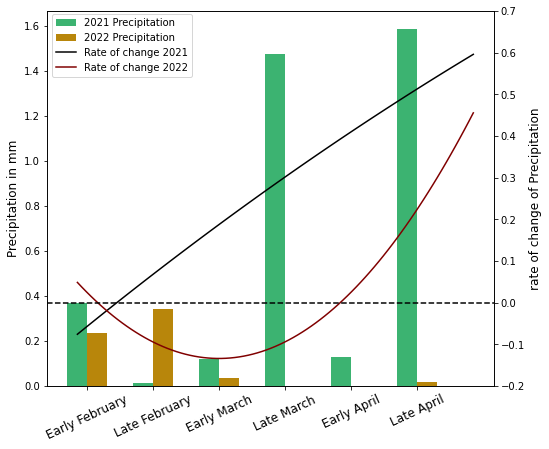

In [ ]:
y = np.arange(0,len(rain_20))
# y = date2num(x)
months = {11:'November', 12:'December', 1:'January', 2:'February', 3:'March', 4:'April', 5:'May'}

width=0.3

plt.figure(figsize=(8,6.9))

# params_20 = np.polyfit(y, np.asarray(ndvi_20), deg=2)
# params_21 = np.polyfit(y + width, np.asarray(ndvi_21), deg=2)
# vals_20 = np.polyval(params_20, y)
# vals_21 = np.polyval(params_21, y + width)

# x_new = np.linspace(0,len(temp_20), 300)
# a_BSpline = make_interp_spline(y, ndvi_20,k=3)
# y_new = a_BSpline(x_new,)

# x_new1 = np.linspace(0,len(temp_21), 300)
# a_BSpline = make_interp_spline(y, ndvi_21,k=3)
# y_new1 = a_BSpline(x_new1)

ax = plt.subplot(111)
b1 = ax.bar(y,np.asarray(rain_20), width=width, color='mediumseagreen', align='center', label='2021 Precipitation')
# l1, = plt.plot(y, vals_20, 'greenyellow', marker = 'x', label='2020-2021 NDVI')
b2 = ax.bar(y+width, np.asarray(rain_21), width=width, color='darkgoldenrod', align='center', label='2022 Precipitation')
# l2, = plt.plot(y + width, vals_21, 'teal', marker = 'o', label='2021-2022 NDVI')

ax2 = ax.twinx()
l1, = ax2.plot(np.linspace(0,len(temp_20), 89), np.diff(y_new)/np.diff(x_new), 'black', label='Rate of change 2021')
l2, = ax2.plot(np.linspace(0,len(temp_20), 89), np.diff(y_new1)/np.diff(x_new), 'maroon', label='Rate of change 2022')
# l1, = ax2.plot(y, vals_20, 'greenyellow', marker = 'x', label='2021 NDVI')
# l2, = ax2.plot(y + width, vals_21, 'teal', marker = 'o', label='2022 NDVI')
ax2.set_ylim(-0.20,0.7)
ax.xaxis_date()
# ax.set_xticklabels(('November', 'December', 'January', 'February', 'March', 'April', 'May'))
# ax.set_xticklabels(('February', 'March', 'April', 'May'))
ax.set_xticks(y + width / 2)

ax.set_xticklabels(
        ['Early February','Late February', 'Early March', 'Late March', 'Early April', 'Late April'],fontsize=12, rotation=25
        )
# plt.xticks(rotation=45, ha='center')
# ax.xaxis.set_ticks_position('none') 
# ax2.setxticks(fontsize=12, rotation=45)
# ax.legend(['2020-2021', '2021-2022'])
# ax2.legend(['2020-2021 NDVI', '2021-2022 NDVI'])

# plt.title("Temperature Data for current and previous year")
ax.set_ylabel('Precipitation in mm', fontsize=12)
ax2.set_ylabel('rate of change of Precipitation', fontsize=12)

lines = [b1,b2,l1,l2]
ax.legend(lines,[l.get_label() for l in lines ], bbox_to_anchor=(0.335,1.005))
plt.axhline(0, linestyle='--', color='black')
plt.savefig('Precipitation for both years.svg', bbox_inches='tight')
# plt.axhline(0, linestyle='--', color='black')
plt.show()

In [ ]:
df_monthly_21 = df_21.groupby(pd.Grouper(freq = "M")).mean()
df_monthly_21.head()

,Temperature,Rainfall,Humidity
Date,,,
2021-11-30,23.933333,0.000000,26.200000
2021-12-31,18.225806,0.006452,29.064516
2022-01-31,14.774194,1.758065,62.419355
2022-02-28,16.785714,0.296429,56.678571
2022-03-31,28.387097,0.016129,33.516129


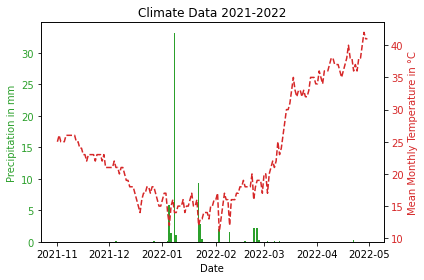

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('Date')
ax1.set_ylabel('Precipitation in mm', color=color)
# ax1.bar(df_monthly_21.index, df_monthly_21["Rainfall"], color=color, width=20, align='center')
ax1.bar(df_21.index, df_21["Rainfall"], color=color, width=1, align='center')

ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Mean Monthly Temperature in °C', color=color)  # we already handled the x-label with ax1
# ax2.plot(df_monthly_21.index, df_monthly_21["Temperature"], color=color, ls = '--')
ax2.plot(df_21.index, df_21["Temperature"], color=color, ls = '--')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Climate Data 2021-2022")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

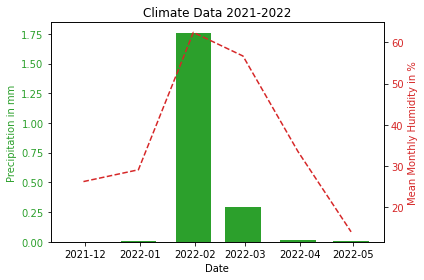

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('Date')
ax1.set_ylabel('Precipitation in mm', color=color)
ax1.bar(df_monthly_21.index, df_monthly_21["Rainfall"], color=color, width=20, align='center')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Mean Monthly Humidity in %', color=color)  # we already handled the x-label with ax1
ax2.plot(df_monthly_21.index, df_monthly_21["Humidity"], color=color, ls = '--')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Climate Data 2021-2022")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
df_monthly_20 = df_20.groupby(pd.Grouper(freq = "M")).mean()
df_monthly_20.head()

,Temperature,Rainfall,Humidity
Date,,,
2020-11-30,23.300000,0.153333,25.966667
2020-12-31,18.709677,0.470968,36.096774
2021-01-31,17.258065,1.741935,44.064516
2021-02-28,23.000000,0.203571,35.178571
2021-03-31,28.451613,0.812903,28.741935


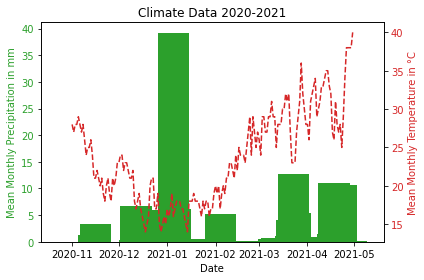

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean Monthly Precipitation in mm', color=color)
ax1.bar(df_20.index, df_20["Rainfall"], color=color, width=20, align='center')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Mean Monthly Temperature in °C', color=color)  # we already handled the x-label with ax1
ax2.plot(df_20.index, df_20["Temperature"], color=color, ls = '--')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Climate Data 2020-2021")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

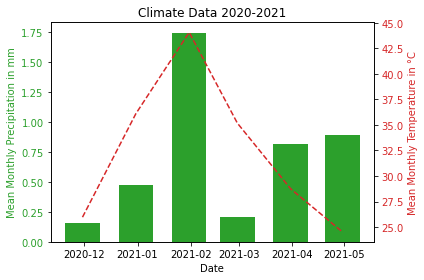

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean Monthly Precipitation in mm', color=color)
ax1.bar(df_monthly_20.index, df_monthly_20["Rainfall"], color=color, width=20, align='center')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Mean Monthly Temperature in °C', color=color)  # we already handled the x-label with ax1
ax2.plot(df_monthly_20.index, df_monthly_20["Humidity"], color=color, ls = '--')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Climate Data 2020-2021")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

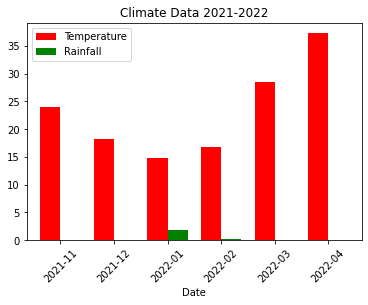

In [ ]:
ax2 = df_monthly_21.plot.bar(width=0.75, rot=45, color=['red','green'])
ax2.set_xticklabels(('2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05'))
plt.title("Climate Data 2021-2022")
plt.show()

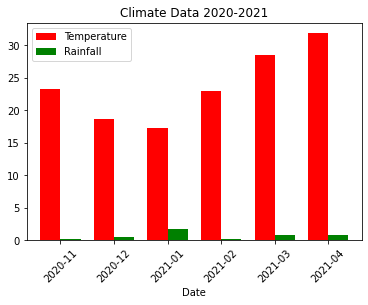

In [ ]:
ax1 = df_monthly_20.plot.bar(width=0.75, rot=45, color=['red','green'])
ax1.set_xticklabels(('2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05'))
plt.title("Climate Data 2020-2021")
plt.show()


### **Comparing temperatures from previous two years** 

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime

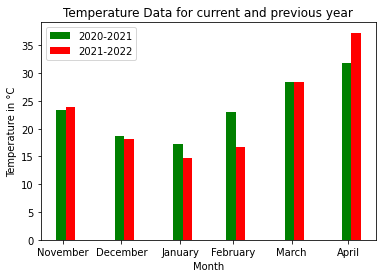

In [ ]:
x = df_month_20.index
x = date2num(x)



ax = plt.subplot(111)
ax.bar(x,df_month_20['Temperature'], width=5, color='g', align='center')
ax.bar(x+5, df_month_21['Temperature'], width=5, color='r', align='center')
ax.xaxis_date()
ax.set_xticklabels(('November', 'December', 'January', 'February', 'March', 'April', 'May'))

plt.legend(['2020-2021', '2021-2022'])
plt.title("Temperature Data for current and previous year")
plt.ylabel('Temperature in °C')
plt.xlabel('Month')

plt.show()

### **Comparing rainfall from previous two years** 

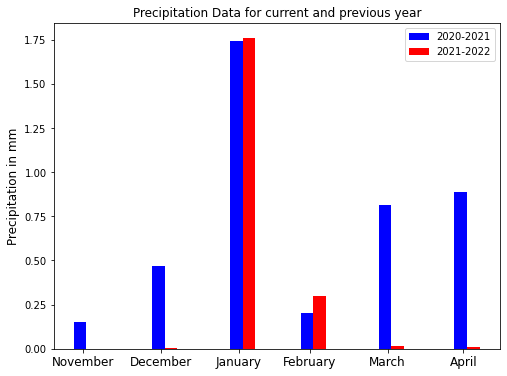

In [ ]:
x = df_month_20.index
x = date2num(x)

plt.figure(figsize=(8,6))

ax = plt.subplot(111)
ax.bar(x,df_month_20['Rainfall'], width=5, color='b', align='center')
ax.bar(x+5, df_month_21['Rainfall'], width=5, color='r', align='center')
ax.xaxis_date()
ax.set_xticklabels(('November', 'December', 'January', 'February', 'March', 'April', 'May'))

plt.legend(['2020-2021', '2021-2022'])
# plt.title("Precipitation Data for current and previous year")
plt.ylabel('Precipitation in mm', fontsize=12)
plt.xticks(fontsize=12)
# plt.xlabel('Month', fontsize=12)
# plt.savefig('Precipitation_curr/prev_years.svg',bbox_inches='tight')
plt.show()

## **Comparing Humidity for previous and the current years** 

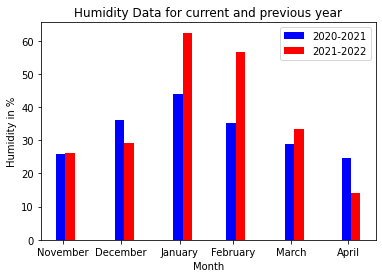

In [ ]:
x = df_monthly_20.index
x = date2num(x)



ax = plt.subplot(111)
ax.bar(x,df_monthly_20['Humidity'], width=5, color='b', align='center')
ax.bar(x+5, df_monthly_21['Humidity'], width=5, color='r', align='center')
ax.xaxis_date()
ax.set_xticklabels(('November', 'December', 'January', 'February', 'March', 'April', 'May'))

plt.legend(['2020-2021', '2021-2022'])
plt.title("Humidity Data for current and previous year")
plt.ylabel('Humidity in %')
plt.xlabel('Month')

plt.show()

# **Plotting NDVI**

In [ ]:
!pip install geopandas geoplot

In [ ]:
import geopandas as gpd
import fiona
import pandas as pd 
import matplotlib.pyplot as plt 

In [ ]:
fiona.drvsupport.supported_drivers['kml'] = 'rw' # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['KML'] = 'rw' # enable KML support which is disabled by default

In [ ]:
def plot_ndvi(start_date, end_date, ndvi_path, polygon_file_path, driver = 'KML'):
  
  # Create a new dataframe for storing the polygons 
  ground_truth = gpd.GeoDataFrame()
  
  # polpulate the dataframe using the .kml file containing all polygons 
  for layer in fiona.listlayers(polygon_file_path):
    s = gpd.read_file(polygon_file_path, driver=driver, layer=layer)
    ground_truth = pd.concat([ground_truth, s], ignore_index=True)
    ground_truth['NDVI'] = 0.0

  # Handle the NDVIs stored in the csv file
  ndvi_df = pd.read_csv(ndvi_path)
  ndvi_df = ndvi_df.dropna()
  # ndvi_df = ndvi_df.drop(['Date1'], 1)
  ndvi_df['Date'] = pd.to_datetime(ndvi_df['Date'], format='%Y-%m-%d')
  ndvi_df = ndvi_df.set_index('Date')
  ndvi = ndvi_df[ndvi_df.index.to_series().between(start_date, end_date)].mean().to_dict()
  
  for i, aoi in ground_truth.iterrows():
    name = aoi['Name']
    ground_truth.at[i, 'NDVI'] = ndvi[f'NDVI{name}.kmz']

      
  
  return ground_truth
  

In [ ]:
ground_truth = plot_ndvi('2022-02-10', '2022-02-10', 'NDVI 2021 Interpolated.csv', '2021-2022 polygons upd.kml')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


## **Weekly Average of NDVI**

In [ ]:
first = plot_ndvi('2022-02-05', '2022-02-15','/content/NDVI 2021 Interpolated.csv', '2021-2022 polygons upd.kml')
second = plot_ndvi('2022-02-24', '2022-03-06','/content/NDVI 2021 Interpolated.csv', '2021-2022 polygons upd.kml')
third = plot_ndvi('2022-03-10', '2022-03-20','/content/NDVI 2021 Interpolated.csv', '2021-2022 polygons upd.kml')
fourth = plot_ndvi('2022-03-28', '2022-04-09','/content/NDVI 2021 Interpolated.csv', '2021-2022 polygons upd.kml')
fifth = plot_ndvi('2022-04-17', '2022-04-27','/content/NDVI 2021 Interpolated.csv', '2021-2022 polygons upd.kml')

## **Daily Average of NDVI (On phenological dates interpolated)**

In [ ]:
# first = plot_ndvi('2022-02-10', '2022-02-10','/content/NDVI 2021 Interpolated UPDATED.csv', '2021-2022 polygons.kml')
# second = plot_ndvi('2022-03-1', '2022-03-01','/content/NDVI 2021 Interpolated UPDATED.csv', '2021-2022 polygons.kml')
# third = plot_ndvi('2022-03-15', '2022-03-15','/content/NDVI 2021 Interpolated UPDATED.csv', '2021-2022 polygons.kml')
# fourth = plot_ndvi('2022-04-3', '2022-04-3','/content/NDVI 2021 Interpolated.csv', '2021-2022 polygons.kml')
# fifth = plot_ndvi('2022-04-22', '2022-04-22','/content/NDVI 2021 Interpolated.csv', '2021-2022 polygons.kml')

In [ ]:
import numpy as np


In [ ]:
polygons_lgreen_stemEL = np.divide(len(first.loc[(first['NDVI'] >= 0.0) & (first['NDVI'] <= 0.8), ['Name']].value_counts()),len(first)) * 100
polygons_dgreen_stemEL = np.divide(len(first.loc[(first['NDVI'] >= 0.8) & (first['NDVI'] <= 1.0), ['Name']].value_counts()),len(first)) * 100

In [ ]:
polygons_lgreen_stemEL

51.96850393700787

In [ ]:
polygons_lgreen_heading = np.divide(len(second.loc[(second['NDVI'] >= 0.6) & (second['NDVI'] <= 0.8), ['Name']].value_counts()),len(second)) * 100
polygons_dgreen_heading = np.divide(len(second.loc[(second['NDVI'] > 0.8) & (second['NDVI'] <= 1.0), ['Name']].value_counts()),len(second)) * 100
polygons_ngreen_heading = np.divide(len(second.loc[(second['NDVI'] >= 0.0) & (second['NDVI'] < 0.6), ['Name']].value_counts()),len(second)) * 100

In [ ]:
polygons_lgreen_heading = np.divide(len(third.loc[(third['NDVI'] >= 0.5) & (third['NDVI'] <= 0.8), ['Name']].value_counts()),len(third)) * 100
polygons_dgreen_heading = np.divide(len(third.loc[(third['NDVI'] > 0.8) & (third['NDVI'] <= 1.0), ['Name']].value_counts()),len(third)) * 100
polygons_ngreen_heading = np.divide(len(third.loc[(third['NDVI'] >= 0.0) & (third['NDVI'] < 0.5), ['Name']].value_counts()),len(third)) * 100

In [ ]:
polygons_dgreen_heading = np.divide(len(fourth.loc[(fourth['NDVI'] > 0.8) & (fourth['NDVI'] <= 1.0), ['Name']].value_counts()),len(fourth)) * 100
polygons_lgreen_heading = np.divide(len(fourth.loc[(fourth['NDVI'] > 0.6) & (fourth['NDVI'] <= 0.8), ['Name']].value_counts()),len(fourth)) * 100
polygons_ndgreen_heading = np.divide(len(fourth.loc[(fourth['NDVI'] > 0.5) & (fourth['NDVI'] <= 0.6), ['Name']].value_counts()),len(fourth)) * 100
polygons_nlgreen_heading = np.divide(len(fourth.loc[(fourth['NDVI'] > 0.3) & (fourth['NDVI'] <= 0.5), ['Name']].value_counts()),len(fourth)) * 100
polygons_ngreen_heading = np.divide(len(fourth.loc[(fourth['NDVI'] > 0.0) & (fourth['NDVI'] <= 0.3), ['Name']].value_counts()),len(fourth)) * 100


In [ ]:
polygons_ndgreen_heading

14.173228346456693

In [ ]:
polygons_lgreen_heading = np.divide(len(fifth.loc[(fifth['NDVI'] >= 0.6) & (fifth['NDVI'] <= 0.8), ['Name']].value_counts()),len(fourth)) * 100
polygons_dgreen_heading = np.divide(len(fifth.loc[(fifth['NDVI'] > 0.8) & (fifth['NDVI'] <= 1.0), ['Name']].value_counts()),len(fourth)) * 100
polygons_ngreen_heading = np.divide(len(fifth.loc[(fifth['NDVI'] >= 0.0) & (fifth['NDVI'] < 0.6), ['Name']].value_counts()),len(fourth)) * 100

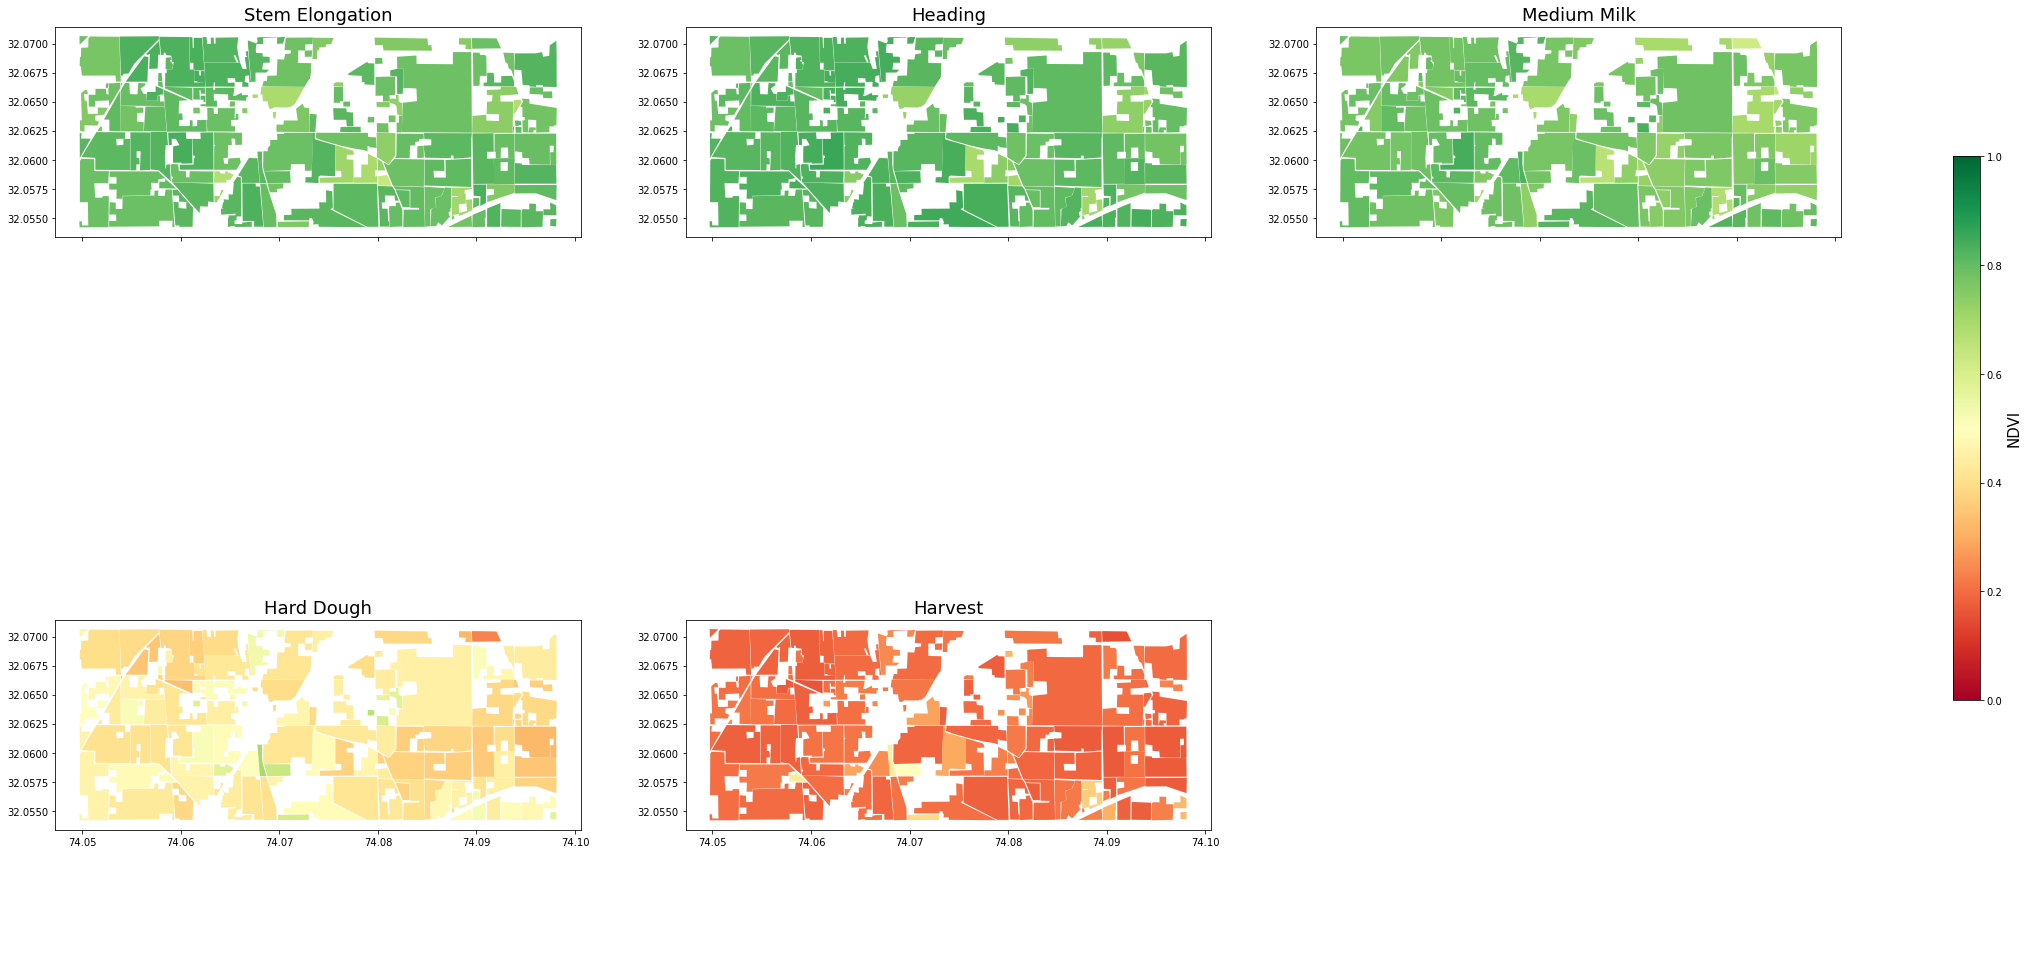

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(40,20), sharex=True, subplot_kw=dict(aspect='equal'))

axes[0][0].set_title("Stem Elongation", fontsize=18)
first.plot(ax=axes[0][0], column='NDVI', cmap='RdYlGn', vmin=0.0, vmax=1.0)

axes[0][1].set_title("Heading", fontsize=18)
second.plot(ax=axes[0][1], column='NDVI', cmap='RdYlGn', vmin=0.0, vmax=1.0)

axes[0][2].set_title("Medium Milk", fontsize=18)
third.plot(ax=axes[0][2], column='NDVI', cmap='RdYlGn', vmin=0.0, vmax=1.0)

axes[1][0].set_title("Hard Dough", fontsize=18)
fourth.plot(ax=axes[1][0], column='NDVI', cmap='RdYlGn', vmin=0.0, vmax=1.0)

axes[1][1].set_title("Harvest", fontsize=18)
fifth.plot(ax=axes[1][1], column='NDVI', cmap='RdYlGn', vmin=0.0, vmax=1.0)


patch_col = axes[0][0].collections[0]
cb = fig.colorbar(patch_col, ax=axes, shrink=0.5)
cb.set_label('NDVI', fontsize=15)

axes[1][2].set_axis_off()
# plt.tight_layout()
# fig.savefig("figure.svg",bbox_inches='tight')


In [ ]:
n = 2 # number of rows
m = 18 # numberof columns
bottom = 0.1; left=0.05
top=1.-bottom; right = 1.-left
fisasp = (1-bottom-(1-top))/float( 1-left-(1-right) )
#widthspace, relative to subplot size
wspace=0.15  # set to zero for no spacing
hspace=wspace/float(3)
#fix the figure height
figheight= 7 # inch
figwidth = (m + (m-1)*wspace)/float((n+(n-1)*hspace)*3)*figheight*fisasp


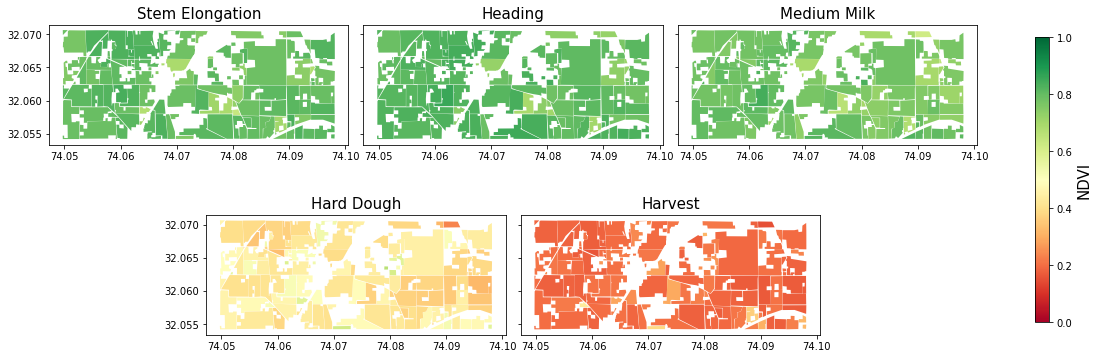

In [ ]:
import matplotlib.gridspec as gridspec
fig= plt.figure(figsize=(figwidth, figheight))

gs = gridspec.GridSpec(2, 18)
gs.update(wspace=0.4, hspace=0)

ax1 = fig.add_subplot(gs[:1, :6], )
ax1.set_title("Stem Elongation", fontsize=15)
first.plot(ax=ax1, column='NDVI', cmap='RdYlGn', vmin=0.0, vmax=1.0)

ax2 = fig.add_subplot(gs[:1, 6:12])
ax2.set_title("Heading",fontsize=15)
second.plot(ax=ax2, column='NDVI', cmap='RdYlGn', vmin=0.0, vmax=1.0)

ax3 = fig.add_subplot(gs[:1, 12:])
ax3.set_title("Medium Milk",fontsize=15)
third.plot(ax=ax3, column='NDVI', cmap='RdYlGn', vmin=0.0, vmax=1.0)

ax4 = fig.add_subplot(gs[1:, 3:9])
ax4.set_title("Hard Dough",fontsize=15)
fourth.plot(ax=ax4, column='NDVI', cmap='RdYlGn', vmin=0.0, vmax=1.0)

ax5 = fig.add_subplot(gs[1:, 9:15])
ax5.set_title("Harvest",fontsize=15)
fifth.plot(ax=ax5, column='NDVI', cmap='RdYlGn', vmin=0.0, vmax=1.0)

patch_col = ax1.collections[0]
cb = fig.colorbar(patch_col, ax=[ax1,ax2,ax3,ax4,ax5], shrink=0.75)
cb.set_label('NDVI', fontsize=15)

plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax5.get_yticklabels(), visible=False)
plt.savefig("figure.svg",bbox_inches='tight')
plt.show()

## **Experiments with Maps** 

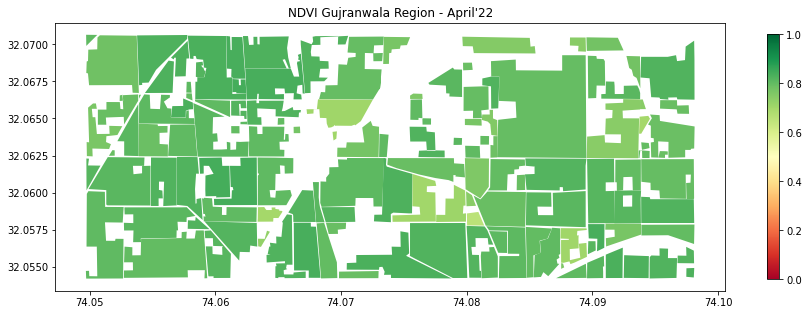

In [ ]:
ax = ground_truth_20.plot('NDVI', figsize = (15,10), legend = 'True', legend_kwds={'shrink': 0.45}, cmap = 'RdYlGn', vmax=1.0, vmin=0.0)
title = ax.set_title("NDVI Gujranwala Region - April'22")




In [ ]:
import geoplot as gplt
import geoplot.crs as gcrs
import geopandas as gpd

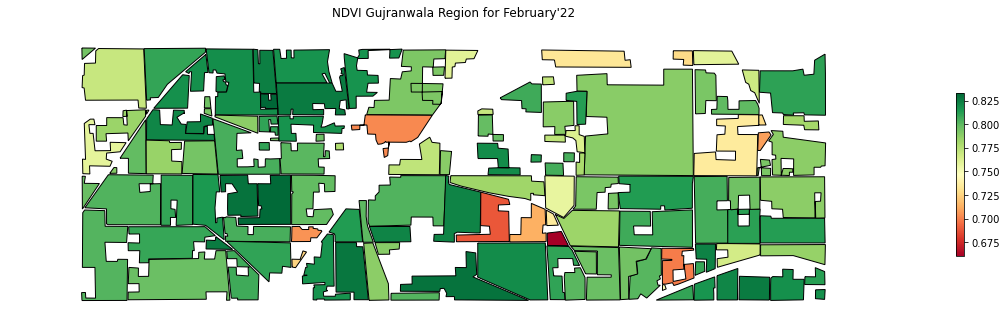

In [ ]:
ax = gplt.choropleth(feb_3, figsize = (20,10), hue='NDVI', legend = 'True', legend_kwargs={ 'shrink': 0.3}, cmap='RdYlGn')
ax = ax.set_title("NDVI Gujranwala Region for February'22", fontsize=12)

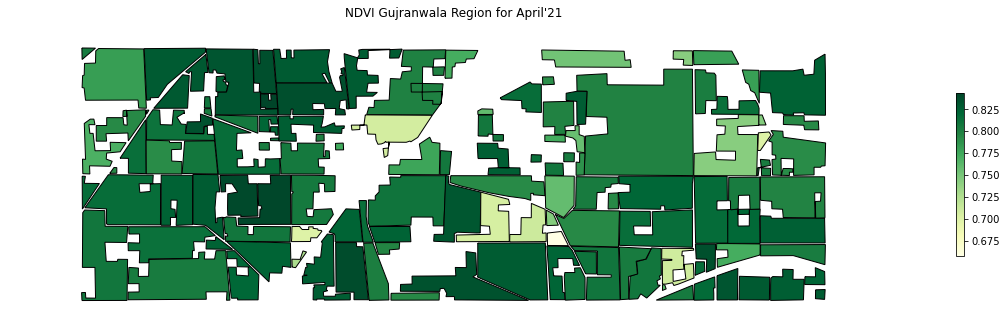

In [ ]:
ax = gplt.choropleth(ground_truth_20, figsize = (20,10), hue='NDVI', legend = 'True', legend_kwargs={'shrink': 0.3}, cmap= 'YlGn')
ax = ax.set_title("NDVI Gujranwala Region for April'21", fontsize=12)

# **Phenology Estimation**

In [ ]:
import pandas as pd

In [ ]:
ndvi_df = pd.read_csv('/content/NDVI 2021 Interpolated.csv')
ndvi_df['Date'] = pd.to_datetime(ndvi_df['Date'], format='%Y-%m-%d')
ndvi_df = ndvi_df.set_index('Date')
# ndvi = ndvi_df[ndvi_df.index.to_series().between(start_date, end_date)].mean().to_dict()

In [ ]:
ndvi_df_20 = pd.read_csv('NDVI 2020.csv')
ndvi_df_20['Date'] = pd.to_datetime(ndvi_df_20['Date'], format='%Y-%m-%d')
ndvi_df_20 = ndvi_df_20.set_index('Date')
# ndvi = ndvi_df[ndvi_df.index.to_series().between(start_date, end_date)].mean().to_dict()

In [ ]:
ndvi_ts = pd.read_csv('NDVI 2021.csv')
ndvi_ts['Date'] = pd.to_datetime(ndvi_ts['Date'], format='%Y-%m-%d')
ndvi_ts = ndvi_ts.set_index('Date')
ndvi_ts.head()

,Date1,NDVI30_11.kmz,NDVI30_12.kmz,NDVI30_21.kmz,NDVI30_22.kmz,NDVI30_31.kmz,NDVI30_32.kmz,NDVI30_41.kmz,NDVI30_42.kmz,NDVI31_11.kmz,...,NDVIpol_24_10.kmz,NDVIpol_24_11.kmz,NDVIpol_24_2.kmz,NDVIpol_24_3.kmz,NDVIpol_24_4.kmz,NDVIpol_24_5.kmz,NDVIpol_24_6.kmz,NDVIpol_24_7.kmz,NDVIpol_24_8.kmz,NDVIpol_24_9.kmz
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-01,01/11/2021,0.12946,0.14191,0.102398,0.119404,0.209435,0.153338,0.160167,0.126529,0.13788,...,0.137126,0.070439,0.100044,0.134102,0.175985,0.083346,0.115763,0.113281,0.086437,0.151634
2021-11-02,02/11/2021,0.12946,0.14191,0.102398,0.119404,0.209435,0.153338,0.160167,0.126529,0.13788,...,0.137126,0.070439,0.100044,0.134102,0.175985,0.083346,0.115763,0.113281,0.086437,0.151634
2021-11-03,03/11/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-04,04/11/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-05,05/11/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ndvi_ts = ndvi_ts.drop('Date1',axis=1)

In [ ]:
ndvi_ts['NDVI'] = ndvi_ts.mean(axis=1)

In [ ]:
ndvi_ts = ndvi_ts.interpolate(method='cubicspline',axis=0)
df_21['NDVI'] = ndvi_ts['NDVI']

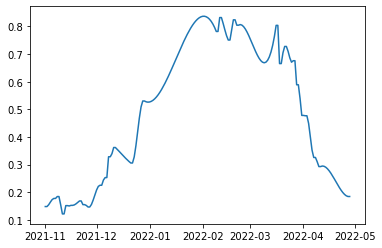

In [ ]:
plt.plot(df_21['NDVI'])

In [ ]:
def plot_curve(Date, NDVI, title):
  # Plot
  plt.plot(Date, NDVI, label='NDVI 2021-2022', 
          linewidth=3)

  # Add title and labels
  plt.title(title)
  plt.xlabel('Date')
  plt.ylabel('NDVI')

  # Add legend
  plt.legend()

  # # Auto space
  # plt.tight_layout()
  # plt.savefig("combined non smoothed NDVI 2021.svg")
  # Display plot
  plt.show() 
  

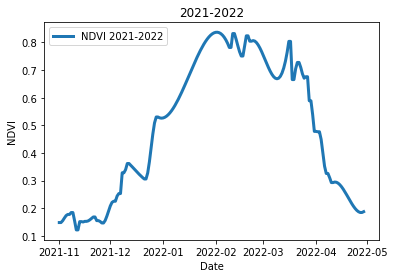

In [ ]:
plot_curve(ndvi_ts.index, ndvi_ts['NDVI'], "2021-2022")

In [ ]:
df_21.drop(df_21.tail(1).index,inplace=True) # drop last n rows

In [ ]:
ndvi_ts.drop(ndvi_ts.tail(1).index,inplace=True) # drop last n rows

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


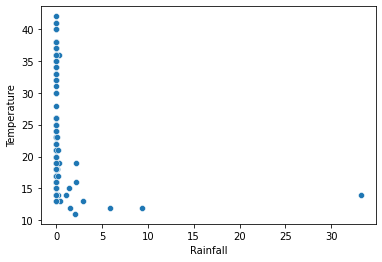

In [ ]:
import seaborn as sns
sns.scatterplot(df_21['Rainfall'],df_21['Temperature'])

# **Local Maximas and Minimas**

In [ ]:
!pip install mahotas
!pip install ruptures
# importing required libraries

import ruptures as rpt
import matplotlib.pyplot as plt
import numpy as np
import mahotas
from pylab import imshow, show
import pandas as pd
import os
import gdal
from scipy.signal import argrelextrema

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 6.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 998 kB 8.5 MB/s 


In [ ]:
n_breaks = 7 #5 phenological stages

def ruptures_model(y):
  model = rpt.Dynp(model="l1")
  model.fit(y)
  breaks = model.predict(n_bkps=n_breaks-1)
  return breaks

def ruptures_breakpoint(breaks, ndvi):
  #breakpoint dates
  breaks_rpt = []
  for i in breaks:
      breaks_rpt.append(ndvi.index[i-1])
  breaks_rpt = pd.to_datetime(breaks_rpt)
  print(breaks_rpt)
  return breaks_rpt

def plot_ruptures(ndvi, breaks_rpt, ilocs_max, ilocs_min):
  #plot
  plt.plot(ndvi, label='data')
  plt.title('Breakpiont')

  #breakpoint
  print_legend = True
  for i in breaks_rpt:
      if print_legend:
          plt.axvline(i, color='red',linestyle='dashed', label='breaks')
          print_legend = False
      else:
          plt.axvline(i, color='red',linestyle='dashed')

  #extram's
  ndvi_ts.iloc[ilocs_max].NDVI.plot(style='.', lw=10, color='red', marker="v", label="max");
  ndvi_ts.iloc[ilocs_min].NDVI.plot(style='.', lw=10, color='green', marker="^", label="min");
  print("Date at Maxima", ndvi_ts.iloc[ilocs_max].NDVI)
  print("Date at Minima", ndvi_ts.iloc[ilocs_min].NDVI)
  
  #plt.grid()
  plt.legend()
 
  # plt.savefig("NDVI1.png")
  plt.show()

DatetimeIndex(['2021-12-05', '2021-12-25', '2022-01-14', '2022-02-28',
               '2022-03-30', '2022-04-04', '2022-04-28'],
              dtype='datetime64[ns]', freq=None)
Date at Maxima Date
2021-11-08    0.184277
2021-11-09    0.184277
2021-11-21    0.168270
2021-11-22    0.168270
2021-12-11    0.361763
2021-12-12    0.361763
2022-02-02    0.836844
2022-02-11    0.832100
2022-02-12    0.832100
2022-02-19    0.823885
2022-02-20    0.823885
2022-03-16    0.803834
2022-03-17    0.803834
Name: NDVI, dtype: float64
Date at Minima Date
2021-11-01    0.148066
2021-11-02    0.148066
2021-11-11    0.121390
2021-11-12    0.121390
2021-11-26    0.146458
2021-11-27    0.146458
2021-12-21    0.305678
2021-12-22    0.305678
2022-02-16    0.750759
2022-02-17    0.750759
2022-03-09    0.668445
2022-03-18    0.665494
2022-03-19    0.665494
2022-04-27    0.184430
2022-04-28    0.184430
Name: NDVI, dtype: float64


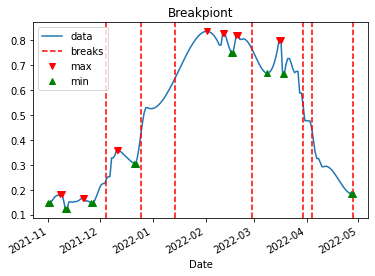

In [ ]:
ndvi =ndvi_ts['NDVI']
y = np.array(ndvi_ts['NDVI'].tolist())

breaks = ruptures_model(y) #pass as list
break_dates = ruptures_breakpoint(breaks, ndvi) #pass a s dataframe

ilocs_min = argrelextrema(ndvi_ts.NDVI.values, np.less_equal, order=8)[0]
ilocs_max = argrelextrema(ndvi_ts.NDVI.values, np.greater_equal, order=6)[0]

plot_ruptures(ndvi, break_dates, ilocs_max, ilocs_min)

In [ ]:
from scipy.signal import savgol_filter
result = savgol_filter(ndvi, 17, 1) # window size 13, polynomial order 3

DatetimeIndex(['2021-12-05', '2021-12-25', '2022-01-14', '2022-02-28',
               '2022-03-30', '2022-04-09', '2022-04-28'],
              dtype='datetime64[ns]', freq=None)
Date at Maxima Date
2021-11-01    0.165212
2022-02-04    0.820126
2022-03-19    0.711001
Name: result, dtype: float64
Date at Minima Date
2021-11-19    0.151002
2022-03-12    0.705313
2022-04-28    0.172930
Name: result, dtype: float64


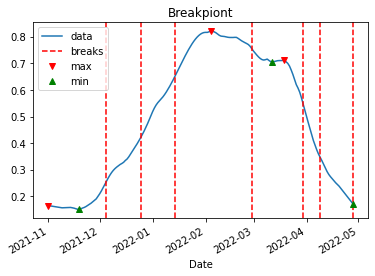

In [ ]:
breaks = ruptures_model(result) #pass as list
ndvi_ts['result'] = result # convert to dataframe, add new column of result to df
break_dates_savgol = ruptures_breakpoint(breaks, ndvi_ts.result) #pass a s dataframe

ilocs_min = argrelextrema(ndvi_ts.result.values, np.less_equal, order=8)[0]
ilocs_max = argrelextrema(ndvi_ts.result.values, np.greater_equal, order=8)[0]


def plot_savgol(ndvi, breaks_rpt, ilocs_max, ilocs_min):
  #plot
  plt.plot(ndvi, label='data')
  plt.title('Breakpiont')

  #breakpoint
  print_legend = True
  for i in breaks_rpt:
      if print_legend:
          plt.axvline(i, color='red',linestyle='dashed', label='breaks')
          print_legend = False
      else:
          plt.axvline(i, color='red',linestyle='dashed')

  #extram's
  ndvi_ts.iloc[ilocs_max].result.plot(style='.', lw=10, color='red', marker="v", label="max");
  ndvi_ts.iloc[ilocs_min].result.plot(style='.', lw=10, color='green', marker="^", label="min");
  print("Date at Maxima", ndvi_ts.iloc[ilocs_max].result)
  print("Date at Minima", ndvi_ts.iloc[ilocs_min].result)
  
  #plt.grid()
  plt.legend()
  # plt.savefig("NDVI1")
  plt.show()


plot_savgol(ndvi_ts.result, break_dates_savgol, ilocs_max, ilocs_min)

## **Experimenting with the selection of maxima and minima**



1.   **If two identified maxima occur less than 15 days apart, we eliminate
the smaller of the two maxima, as well as the minimum in between
those maxima.**

2.   **Avoid the selection of a min-max-min segment that is composed of
a relevant maximum bounded by irrelevant minima at its sides**
        
        *   compute the VI area below the segment that connects the two maxima and
above the overall VI minimum
        *   compute the area of the triangle connecting the two maxima and the minimum in between. 
        * The ratio B/A quantifies the effect of the minimum. (The minimum is discarded if this ratio is smaller than 0.15). This value is inspired by the authors of the paper,  ***Meroni, M.; D’Andrimont, R.; Vrieling, A.; Fasbender, D.; Lemoine, G.; Rembold, F.; Seguini, L.; Verhegghen, A. Comparing
land surface phenology of major European crops as derived from SAR and multispectral data of Sentinel-1 and -2. Remote Sens.
Environ. 2021, 253, 112232.***








In [ ]:
df_optima = pd.concat([ndvi_df.iloc[ilocs_max], ndvi_df.iloc[ilocs_min]], axis = 0)

In [ ]:
df_optima.drop(df_optima.columns.difference(['NDVI','result']), 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
df_optima.head()

,NDVI,result
Date,,
2021-11-01,0.148066,0.164460
2022-02-27,0.804297,0.806576
2021-11-19,0.160308,0.151372
2022-04-29,0.184430,0.175141


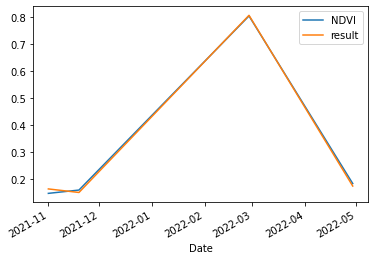

In [ ]:
df_optima.plot()

In [ ]:
x = df_optima.index.unique().to_list()[:-1]
y = df_optima.loc[x].result.values

In [ ]:
def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

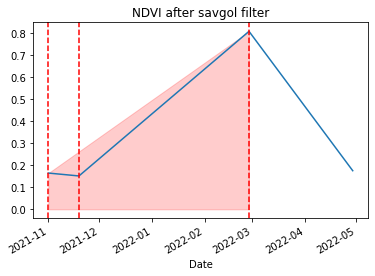

In [ ]:
df_optima.result.plot()
plt.title('NDVI after savgol filter')
plt.fill_between(
        x= x[:-1], 
        y1= y[:-1], 
        color= "r",
        alpha= 0.2)

for i in x:
  plt.axvline(i, color='red',linestyle='dashed')
        
plt.show()

In [ ]:
import numpy as np
from scipy.integrate import simps
from numpy import trapz


# The y values.  A numpy array is used here,
# but a python list could also be used.
y = y

# Compute the area using the composite trapezoidal rule.
A = trapz(y, x=[1,57,19])
B = PolyArea([1,57,19],y)
print("A =", A)
print("B =", B)
print("B/A =", np.divide(B,A))

A = 8.988003348025973
B = 6.145509978474793
B/A = 0.683745848829098


# **Final Experiments**

In [ ]:
# 2020-2021
ndvi_df_20 = ndvi_df_20.interpolate(method='cubicspline',axis=0)
ndvi_df_20['NDVI'] = ndvi_df_20.mean(axis=1)
df_20['NDVI'] = ndvi_df_20['NDVI']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_20.drop(df_20.tail(1).index,inplace=True) # drop last n rows

In [ ]:
df = df_21.copy()
df['NDVI'] = ndvi_df['NDVI']
df.head()

,Temperature,Rainfall,Humidity,NDVI
Date,,,,
2021-11-01,25,0.0,39.0,0.148066
2021-11-02,26,0.0,37.0,0.148066
2021-11-03,25,0.0,30.0,0.155397
2021-11-04,25,0.0,32.0,0.162729
2021-11-05,25,0.0,32.0,0.170061


In [ ]:
for col in df.columns.to_list():
  df[col] = (df[col] - df[col].min())/(df[col].max() - df[col].min())
df.head()

,Temperature,Rainfall,Humidity,NDVI
Date,,,,
2021-11-01,0.451613,0.0,0.367816,0.037534
2021-11-02,0.483871,0.0,0.344828,0.037534
2021-11-03,0.451613,0.0,0.264368,0.047850
2021-11-04,0.451613,0.0,0.287356,0.058166
2021-11-05,0.451613,0.0,0.287356,0.068483


<Figure size 1080x720 with 0 Axes>

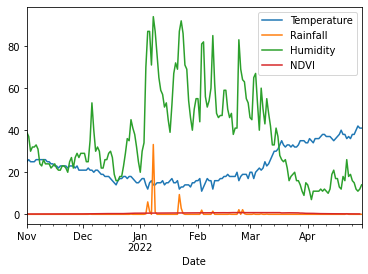

In [ ]:
plt.figure(figsize=(15,10))
df.plot()

In [ ]:
import seaborn as sns

In [ ]:
df_month_20 = df_20.groupby(pd.Grouper(freq = 'M')).mean()
df_month_21 = df_21.groupby(pd.Grouper(freq = 'M')).mean()

In [ ]:
df_month.head()

In [ ]:
df_month['Month'] = ['November', 'December', 'January', 'February', 'March', 'April']

In [ ]:
df_month.head(6)

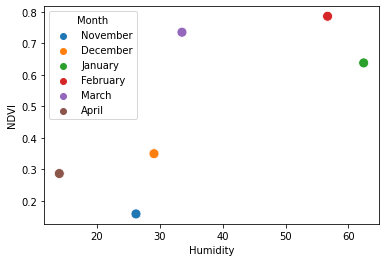

In [ ]:
# plt.figure(figsize=(25,20))
g=sns.scatterplot(x="Humidity", y="NDVI", hue = df_month['Month'], data=df_month,s=100);
# g.plot_joint(sns.kdeplot, color='gray', levels=10)

In [ ]:
g=sns.jointplot(x="NDVI", y="Humidity", data=df, ratio=2, height=8, space=0.2, joint_kws={'color': 'red', 'marker':'^'}, kind='reg', marginal_kws = {'color':'green'});
# g.plot_joint(sns.kdeplot, color='gray', levels=5)

## **Research on Climate and NDVI relationship**

In [ ]:
def printStats(property=0, color='red'):
  '''
  The following function compare averages of different climatic factors over 2021 and 2022
    property is an int that can assume any 3 values
    0, 1 or 2.
    0 refers to Temperature
    1 refers to Rainfall
    2 refers to Humidity
  '''
  opt = ['Temperature', 'Rainfall', 'Humidity']
  avg21 = df_20[df_20.index.to_series().between('21-01-01', '21-04-30')].mean()[property]
  avg22 = df_21[df_21.index.to_series().between('22-01-01', '22-04-30')].mean()[property]
  ax = plt.plot([avg21,avg22], c=color)
  ax = plt.title(f'Change in {opt[property]} from 2021 to 2022')
  print(f'Average {opt[property]}e in 2021 (Jan - Apr): {avg21:.3f}')
  print(f'Average {opt[property]} in 2022 (Jan - Apr): {avg22:.3f}')


In [ ]:
printStats(1)


In [ ]:
df_month

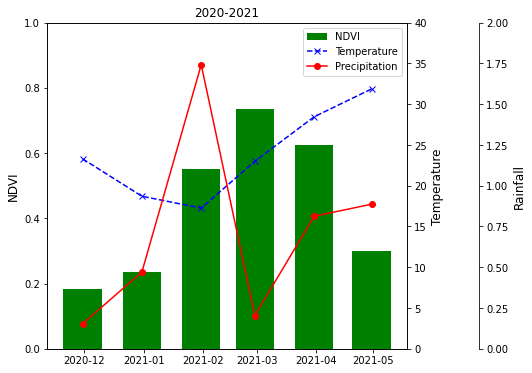

In [ ]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)
from matplotlib import rc
rc('mathtext', default='regular')

fig, host = plt.subplots(figsize = (8,6))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1 = host.bar(df_month_20.index, df_month_20["NDVI"], color='green', width=20, align='center', label="NDVI")
p2, = par1.plot(df_month_20.index, df_month_20["Temperature"], color="blue", ls = '--', marker='x', label="Temperature")
p3, = par2.plot(df_month_20.index, df_month_20["Rainfall"], "red", marker='o', label="Precipitation")

# p1 = host.bar(df_21.index, df_21["NDVI"], color='green', width=20, align='center', label="NDVI")
# p2, = par1.plot(df_21.index, df_21["Temperature"], color="blue", ls = '--', marker='x', label="Temperature")
# p3, = par2.plot(df_21.index, df_21["Rainfall"], "red", label="Precipitation")

host.set_ylabel('NDVI', fontsize=12)
par1.set_ylabel('Temperature', fontsize=12)
par2.set_ylabel('Rainfall', fontsize=12)
# host.set_xlim(0, 2)
lines = [p1, p2, p3]

par2.legend(lines, [l.get_label() for l in lines])
# host.legend()
# par1.legend()
# par2.legend()
host.set_ylim(0, 1)
par1.set_ylim(0, 40)
par2.set_ylim(0, 2)

plt.title('2020-2021', fontsize=12)

fig.savefig('NDVI-Temp-Preciptation (2020-2021).svg')

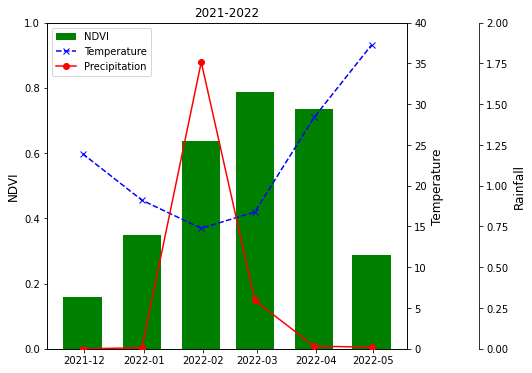

In [ ]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (8,6))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1 = host.bar(df_month_21.index, df_month_21["NDVI"], color='green', width=20, align='center', label="NDVI")
p2, = par1.plot(df_month_21.index, df_month_21["Temperature"], color="blue", ls = '--', marker='x', label="Temperature")
p3, = par2.plot(df_month_21.index, df_month_21["Rainfall"], "red",marker='o', label="Precipitation")

# p1 = host.bar(df_21.index, df_21["NDVI"], color='green', width=20, align='center', label="NDVI")
# p2, = par1.plot(df_21.index, df_21["Temperature"], color="blue", ls = '--', marker='x', label="Temperature")
# p3, = par2.plot(df_21.index, df_21["Rainfall"], "red", label="Precipitation")

host.set_ylabel('NDVI', fontsize=12)
par1.set_ylabel('Temperature', fontsize=12)
par2.set_ylabel('Rainfall', fontsize=12)
# host.set_xlim(0, 2)
lines = [p1, p2, p3]

par1.legend(lines, [l.get_label() for l in lines])

host.set_ylim(0, 1)
par1.set_ylim(0, 40)
par2.set_ylim(0, 2)

plt.title('2021-2022', fontsize=12)

fig.savefig('NDVI-Temp-Preciptation (2021-2022).svg', bbox_inches='tight')